https://www.youtube.com/watch?v=W5NPlZzebO0

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Concatenate,Reshape,Embedding, Input,Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os 
from tqdm import tqdm
from skimage.io import imread 
import cv2
import numpy as np

# Set the random seed for reproducibility
tf.random.set_seed(42)

TRAIN_FOLDER =r'C:\Code\stamatelopoulos\validation'
normal = []
pathologic = []
labels_sex = []
for folder in tqdm(os.listdir(TRAIN_FOLDER)[:10]):
    
    for single_image in os.listdir(os.path.join(TRAIN_FOLDER, folder))[:10]:
        if single_image.endswith(".jpg") or single_image.endswith(".png"):
            split = single_image.split(" ")
            if split[0][-1]=='s':
                labels_sex.append('Male')
            else:
                labels_sex.append("Female")
            
            im1 = imread(os.path.join(TRAIN_FOLDER, folder, single_image))
            im1 = im1 / 255.
            if folder=='normal':
                normal.append(cv2.resize(im1,(224, 224)))
            else:
                pathologic.append(cv2.resize(im1,(224, 224)))

normal = np.array(normal)
pathologic = np.array(pathologic)
print(normal.shape,pathologic.shape)
X = np.concatenate((normal,pathologic),axis=0)
print(X.shape,len(labels_sex))

100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

(10, 224, 224, 3) (10, 224, 224, 3)
(20, 224, 224, 3) 20


In [2]:

from tensorflow.keras.utils import to_categorical
y = np.array( [0 for i in range(len(normal))]+[1 for i in range(len(pathologic))])[...,np.newaxis]

y.shape

(20, 1)

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(labels_sex)
labels_sex = le.transform(labels_sex)
labels_sex

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [4]:
"""
class 1 from 0 to 30 
class 2 from 30 to 60
class 3 from 60 to 100
"""
age_class = np.random.randint(0,3,size=(X.shape[0]))
age_class

array([2, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 1])

In [5]:
from sklearn.model_selection import train_test_split
X_train,  X_test,  y_train, y_test,   labels_sex_train, labels_sex_test,  labels_age_train, labels_age_test = train_test_split( X, y, labels_sex, age_class, test_size=0.4, random_state=42)


In [8]:
from My_model import MultipleInputsModel

model =MultipleInputsModel(input_shape=(224,224,3),sex_label_shape=(1,),age_label_shape=(1,))

# Train the model
history = model.fit (x=([X_train, labels_sex_train, labels_age_train]),y=y_train,
                     validation_data=(([X_test,labels_sex_test,labels_age_test] ),y_test),
                     epochs=20)





Epoch 1/20


1/1 [==============================] - 6s 6s/step - loss: 0.6899 - accuracy: 0.5833 - val_loss: 0.6685 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 1s 1s/step - loss: 0.5991 - accuracy: 0.8333 - val_loss: 0.7418 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 0.6821 - accuracy: 0.7500 - val_loss: 0.7474 - val_accuracy: 0.6250
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 0.8224 - accuracy: 0.4167 - val_loss: 1.0375 - val_accuracy: 0.3750
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 0.5379 - accuracy: 0.6667 - val_loss: 0.9567 - val_accuracy: 0.3750
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 0.5600 - accuracy: 0.7500 - val_loss: 0.7167 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 0.4368 - accuracy: 0.8333 - val_loss: 0.6810 - val_accuracy: 0.7500
Epoch 8/20
1/1 [====================

In [ ]:
# tf.random.set_seed(42)
# # Define constants
# input_shape = (224, 224, 3)  
# batch_size = 2
# epochs = 20
# TARGET_W = 224
                                          
# # Functional API

# sex_label =Input(shape=(1,)) 
# sex = Embedding (2,50)(sex_label)
# n_nodes = TARGET_W * TARGET_W 
# sex = Dense(n_nodes)(sex)
# sex_out = Reshape((TARGET_W,TARGET_W,1))(sex)

# age_label =Input(shape=(1,))
# age = Embedding (3,50)(age_label)
# n_nodes = TARGET_W * TARGET_W 
# age = Dense(n_nodes)(age)
# age_out = Reshape((TARGET_W,TARGET_W,1))(age)

# merge_embed = Concatenate()([sex_out,age_out])


# input_image = Input(shape=input_shape)
# merge = Concatenate()([input_image,merge_embed])
# x = Conv2D(32, (3, 3), activation='relu')(merge)
# x = MaxPooling2D((2, 2))(x)
# x = Conv2D(64, (3, 3), activation='relu')(x)
# x = MaxPooling2D((2, 2))(x)
# x = Conv2D(128, (3, 3), activation='relu')(x)
# x = MaxPooling2D((2, 2))(x)
# x = Conv2D(128, (3, 3), activation='relu')(x)
# x = MaxPooling2D((2, 2))(x)
# x = Flatten()(x)
# x = Dense(512, activation='relu')(x)
# x = Dropout(0.5)(x)
# output_layer = Dense(1, activation='sigmoid')(x)

# # Create the model

# model = Model([input_image,sex_label,age_label], outputs=output_layer)

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit (x=([X_train, labels_sex_train, labels_age_train]),y=y_train,
#                      validation_data=(([X_test,labels_sex_test,labels_age_test] ),y_test),
#                      epochs=20)


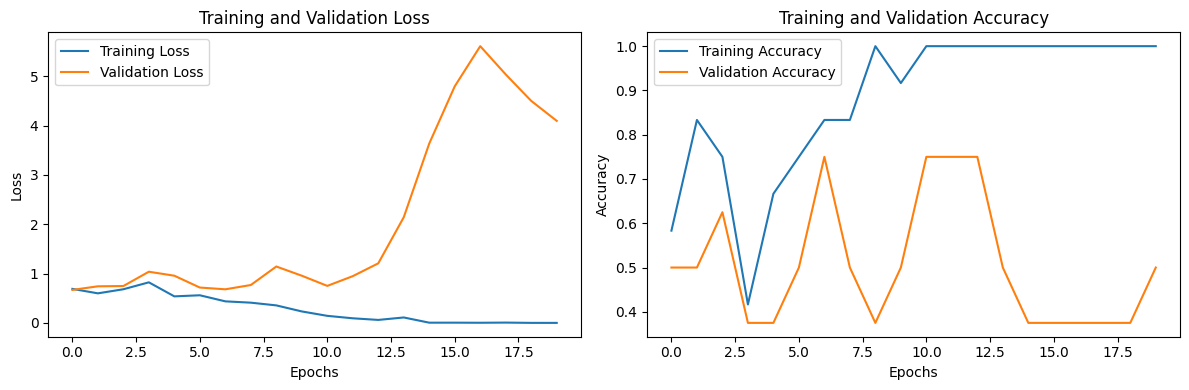

In [9]:
import matplotlib.pyplot as plt


# Plot training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
import plotly.graph_objects as go
import plotly.express as px



# Create a Plotly figure for loss
fig_loss = go.Figure()

fig_loss.add_trace(go.Scatter(x=history.epoch,
                             y=history.history['loss'],
                             mode='lines',
                             name='Training Loss',
                             line=dict(color='blue')))
fig_loss.add_trace(go.Scatter(x=history.epoch,
                             y=history.history['val_loss'],
                             mode='lines',
                             name='Validation Loss',
                             line=dict(color='orange')))

fig_loss.update_layout(title='Training and Validation Loss',
                      xaxis_title='Epochs',
                      yaxis_title='Loss',
                      template='plotly_dark')

# Create a Plotly figure for accuracy
fig_accuracy = go.Figure()

fig_accuracy.add_trace(go.Scatter(x=history.epoch,
                                 y=history.history['accuracy'],
                                 mode='lines',
                                 name='Training Accuracy',
                                 line=dict(color='green')))
fig_accuracy.add_trace(go.Scatter(x=history.epoch,
                                 y=history.history['val_accuracy'],
                                 mode='lines',
                                 name='Validation Accuracy',
                                 line=dict(color='red')))

fig_accuracy.update_layout(title='Training and Validation Accuracy',
                          xaxis_title='Epochs',
                          yaxis_title='Accuracy',
                          template='plotly_dark')

# Show the figures
fig_loss.show()
fig_accuracy.show()


In [11]:
model.predict([X_test,labels_sex_test,labels_age_test] )

1/1 [==============================] - 0s 497ms/step


array([[0.9999865 ],
       [0.9999764 ],
       [0.9997741 ],
       [1.        ],
       [0.8785016 ],
       [0.16273236],
       [0.99998975],
       [0.8429852 ]], dtype=float32)

In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Assuming you have a single image file path, sex label, and age label
image_path = r'C:\Code\stamatelopoulos\validation\pathological\paliovrisiotis konstantinos 1.1.jpg'
sex_label = 'Male'  # or 'Female'
age_label = 0  # or any appropriate age label

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Assuming you normalized your images during training

# Encode sex label
sex_encoded = le.transform([sex_label])

# Encode age label
age_encoded = np.array([age_label])

# Make the prediction
prediction = model.predict([img_array, sex_encoded, age_encoded])

# Convert the prediction to a binary class (0 or 1)
binary_prediction = 1 if prediction > 0.5 else 0

print("Predicted Probability:", prediction)
print("Predicted Class:", binary_prediction)


1/1 [==============================] - 0s 78ms/step
Predicted Probability: [[0.99999994]]
Predicted Class: 1


In [13]:
model.predict([np.expand_dims(X_test[5],axis=0) ,   np.array([labels_sex_test[5]]),  np.array([labels_sex_test[5]])   ] )

1/1 [==============================] - 0s 74ms/step


array([[0.16273227]], dtype=float32)

In [ ]:
# tf.random.set_seed(42)
# # Define constants
# input_shape = (224, 224, 3)  # Assuming images are RGB with size 150x150
# batch_size = 2
# epochs = 1
# TARGET_W = 224
                                          
# # Functional API

# in_label =Input(shape=(1,)) 
# li = Embedding (2,50)(in_label)
# n_nodes = TARGET_W * TARGET_W # 16128
# li = Dense(n_nodes)(li)
# li = Reshape((TARGET_W,TARGET_W,1))(li)

# input_image = Input(shape=input_shape)
# merge = Concatenate()([input_image,li])
# x = Conv2D(32, (3, 3), activation='relu')(merge)
# x = MaxPooling2D((2, 2))(x)
# x = Conv2D(64, (3, 3), activation='relu')(x)
# x = MaxPooling2D((2, 2))(x)
# x = Conv2D(128, (3, 3), activation='relu')(x)
# x = MaxPooling2D((2, 2))(x)
# x = Conv2D(128, (3, 3), activation='relu')(x)
# x = MaxPooling2D((2, 2))(x)
# x = Flatten()(x)
# x = Dense(512, activation='relu')(x)
# x = Dropout(0.5)(x)
# output_layer = Dense(1, activation='sigmoid')(x)

# # Create the model
# # model = Model([in_label,input_image], outputs=output_layer)
# model = Model([input_image,in_label,], outputs=output_layer)

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit (x=([X_train,labels_train]),y=y_train,
#                      validation_data=(([X_test,labels_test] ),y_test),
#                      epochs=2)




